In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Metrics for model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, precision_score, \
recall_score, confusion_matrix

# Importing Models -- LightBoost, Logistic, Randomforest
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import Imputer # For Missing Value Imputation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgbm
import warnings

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Reading the data
df = pd.read_csv('adult.data',header = None)
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [3]:
## Description of the data
def basic_description(df): 
    ''' This function gives the basic information about the dataset'''
    
    print('Total no of rows: {} and columns: {}  in the dataframe' .format(df.shape[0],df.shape[1]))
    print('\n')
    
    print('Columns in the dataset')
    print(df.columns.values)
    print('\n')
    
    print('Datatypes of all columns')
    print(df.dtypes)
    print('\n')
    
    print('Sample data')
    print(df.head(10))
    print('\n')
    
    print('Unique values in each column')
    print(df.nunique())
    print('\n')
    
    print('Total percentage of missing values in each column')
    try:
        k = df.isna().sum()*100/len(df).sort_values(ascending = False)
    except:
        k = df.isna().sum()*100/len(df)
    print(k)
    print('\n')
    
    print('Description of the continuous columns in the data')
    print(df.describe())
    

In [5]:
basic_description(df)

Total no of rows: 32561 and columns: 15  in the dataframe


Columns in the dataset
['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country' 'income']


Datatypes of all columns
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


Sample data
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        

1. People from certain workclass/occupation have a high income  
2. People from a particular race have a high income  
3. Gender has an effect on income  
4. hours_per_Week has an effect on income  
5. education has an effect on income  

In [6]:
# Distribution of target variable
df['income'].value_counts()/len(df)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

<Figure size 2160x360 with 0 Axes>

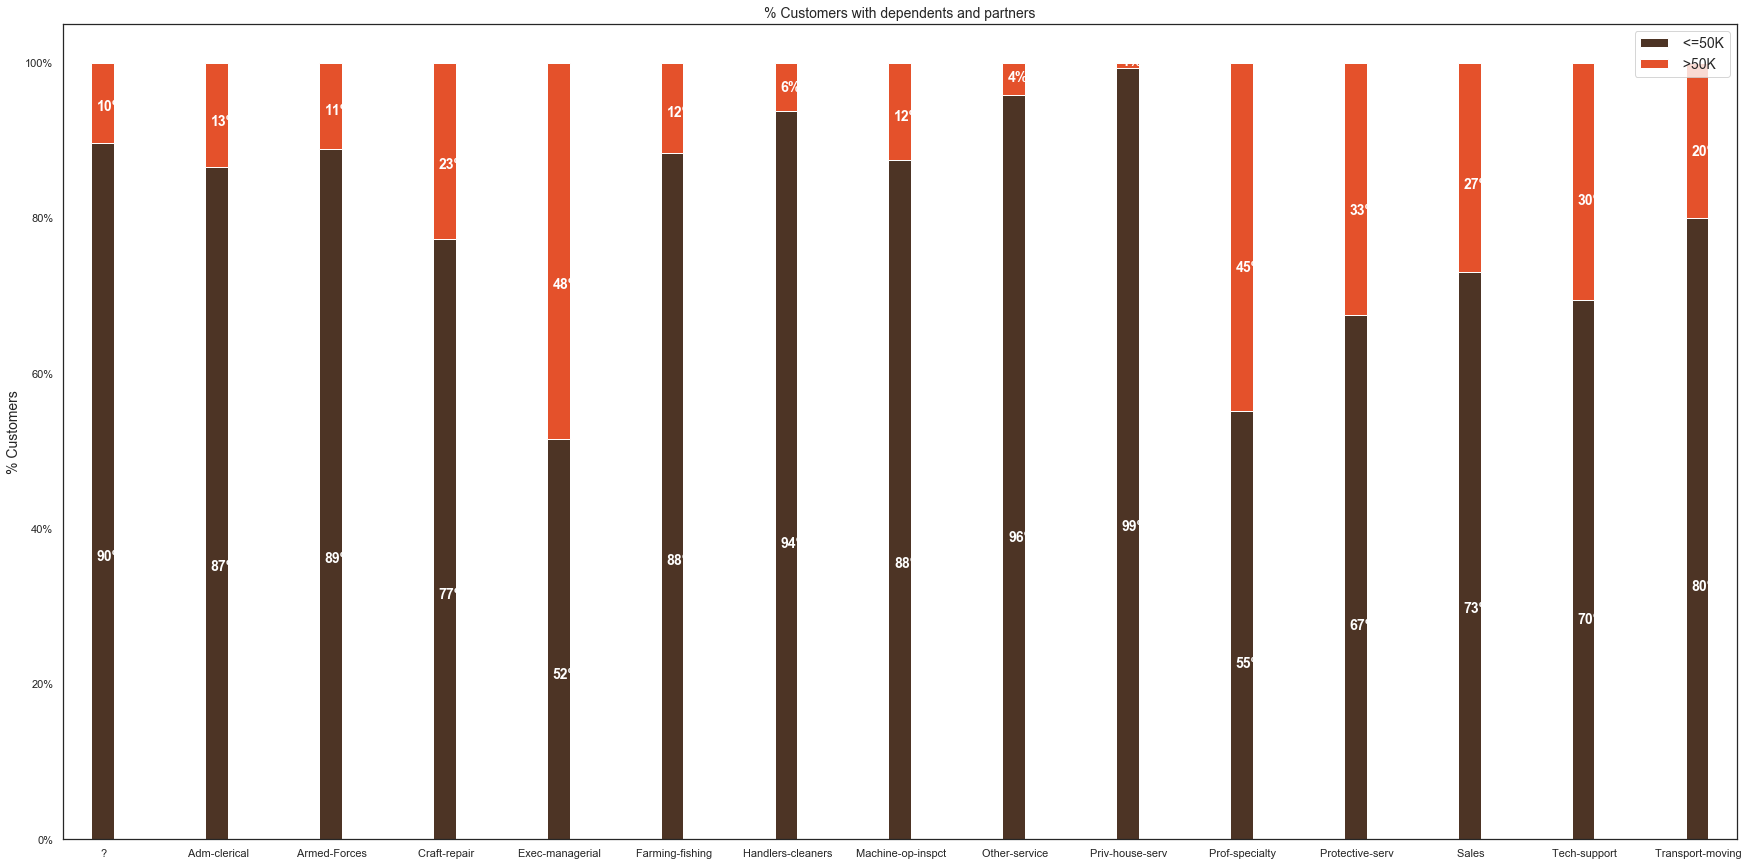

In [8]:
# Distributions of the different variables
# Percentage distribution of occupation

df2 = pd.DataFrame(df.groupby(['occupation','income'])['income'].count())
df3 = df2.unstack()
df3 = df3.iloc[:,:].apply(lambda x: x*100/x.sum(),axis = 1)

plt.figure(figsize = (30,5))
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'income'].plot.bar(stacked=True, color=colors,
                                      figsize=(30,15),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'upper right',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
plt.show()

<Figure size 2160x360 with 0 Axes>

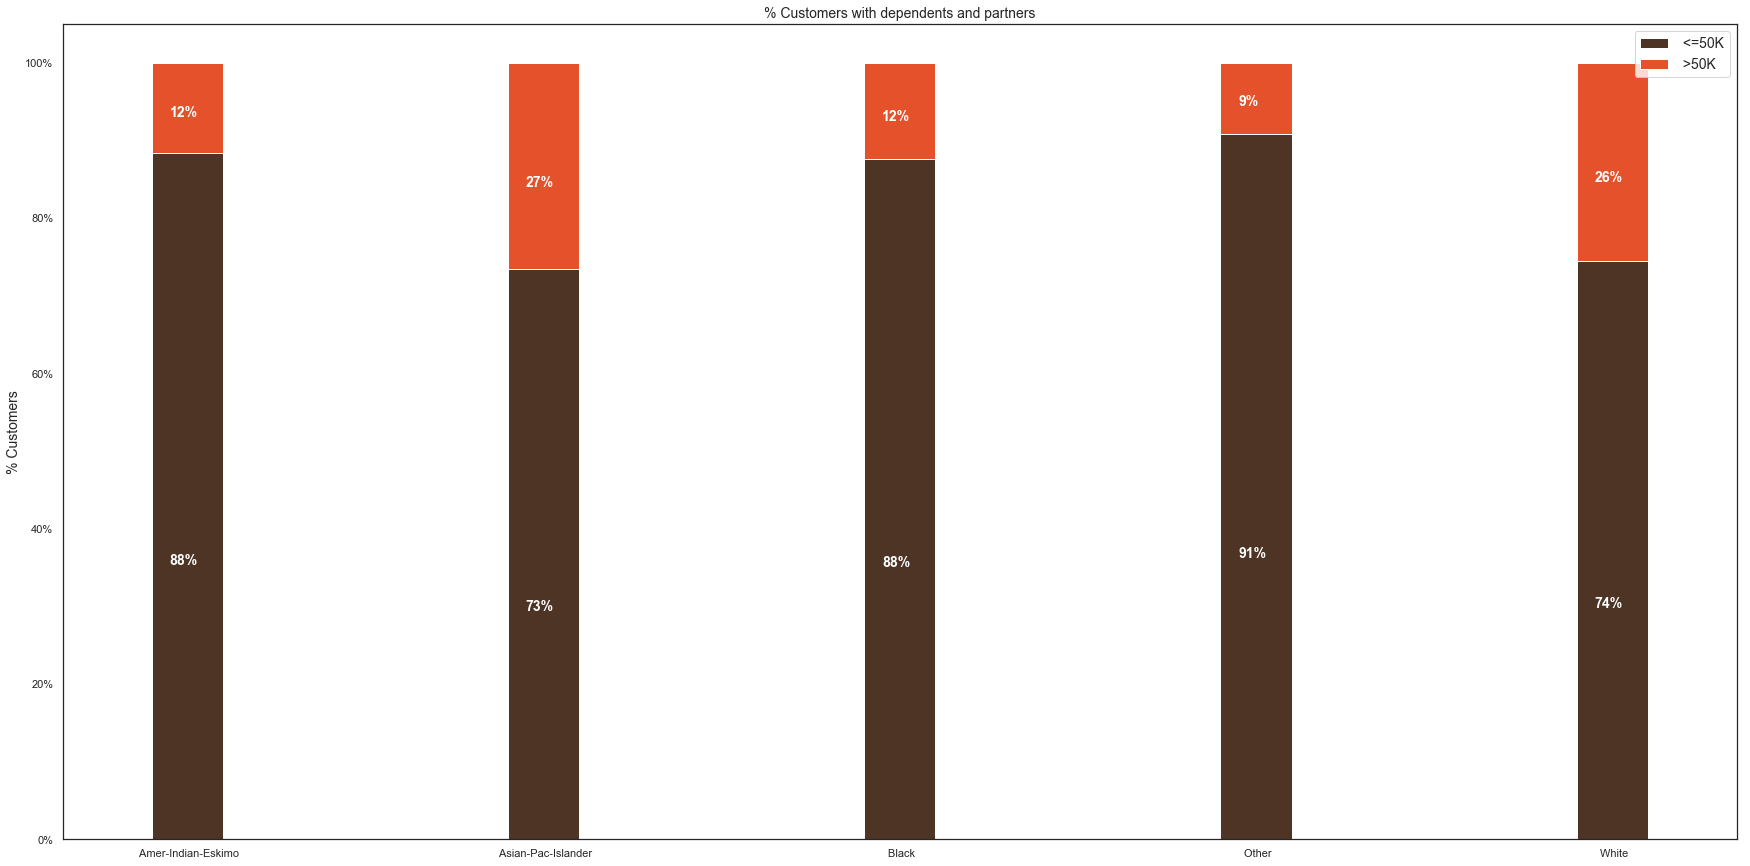

In [36]:
# Percentage distribution of race

df2 = pd.DataFrame(df.groupby(['race','income'])['income'].count())
df3 = df2.unstack()
df3 = df3.iloc[:,:].apply(lambda x: x*100/x.sum(),axis = 1)

plt.figure(figsize = (30,5))
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'income'].plot.bar(stacked=True, color=colors,
                                      figsize=(30,15),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'upper right',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
plt.show()

<Figure size 2160x360 with 0 Axes>

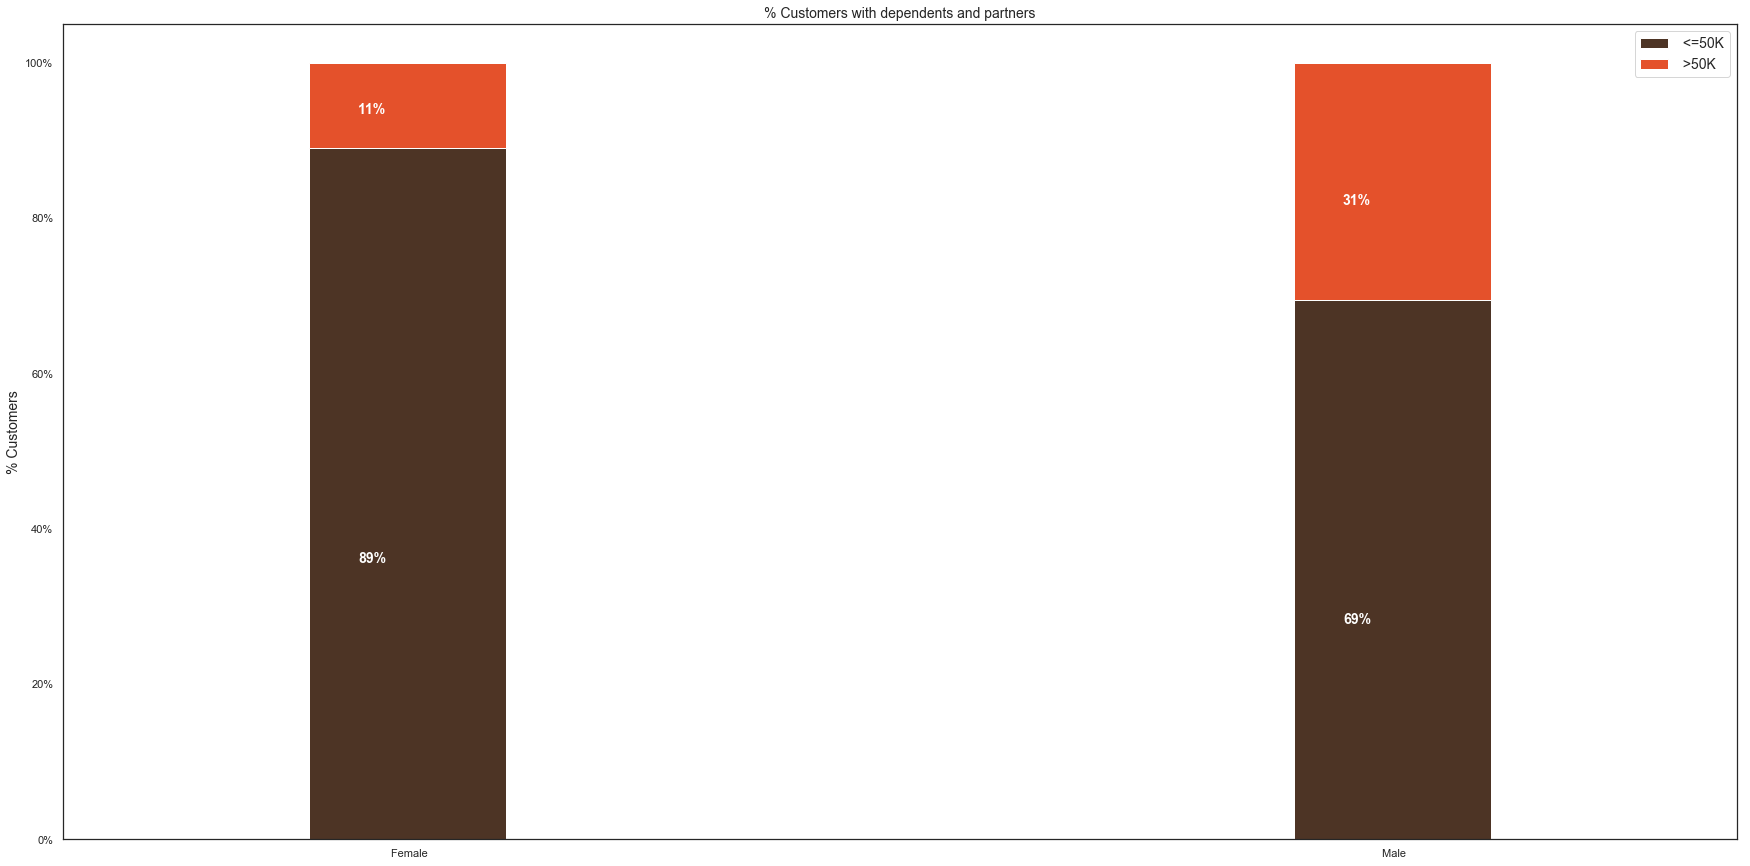

In [9]:
# Percentage distribution of gender

df2 = pd.DataFrame(df.groupby(['sex','income'])['income'].count())
df3 = df2.unstack()
df3 = df3.iloc[:,:].apply(lambda x: x*100/x.sum(),axis = 1)

plt.figure(figsize = (30,5))
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'income'].plot.bar(stacked=True, color=colors,
                                      figsize=(30,15),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'upper right',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
plt.show()

<Figure size 2160x360 with 0 Axes>

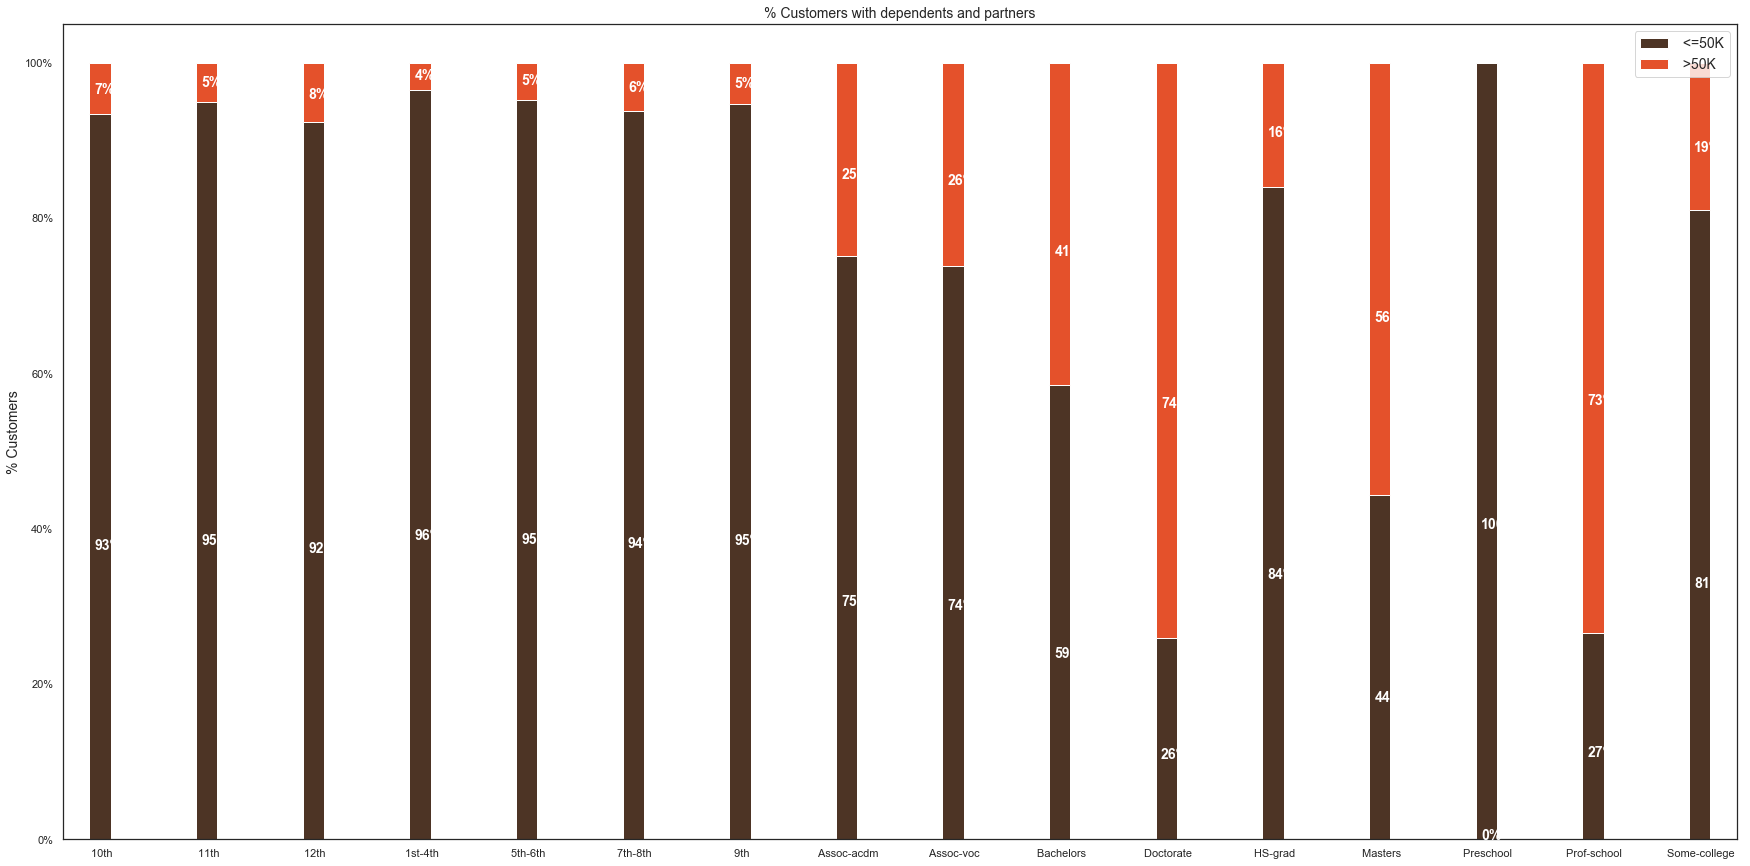

In [10]:
# Percentage distribution of education

df2 = pd.DataFrame(df.groupby(['education','income'])['income'].count())
df3 = df2.unstack()
df3 = df3.iloc[:,:].apply(lambda x: x*100/x.sum(),axis = 1)

plt.figure(figsize = (30,5))
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'income'].plot.bar(stacked=True, color=colors,
                                      figsize=(30,15),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'upper right',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
plt.show()

<Figure size 2160x360 with 0 Axes>

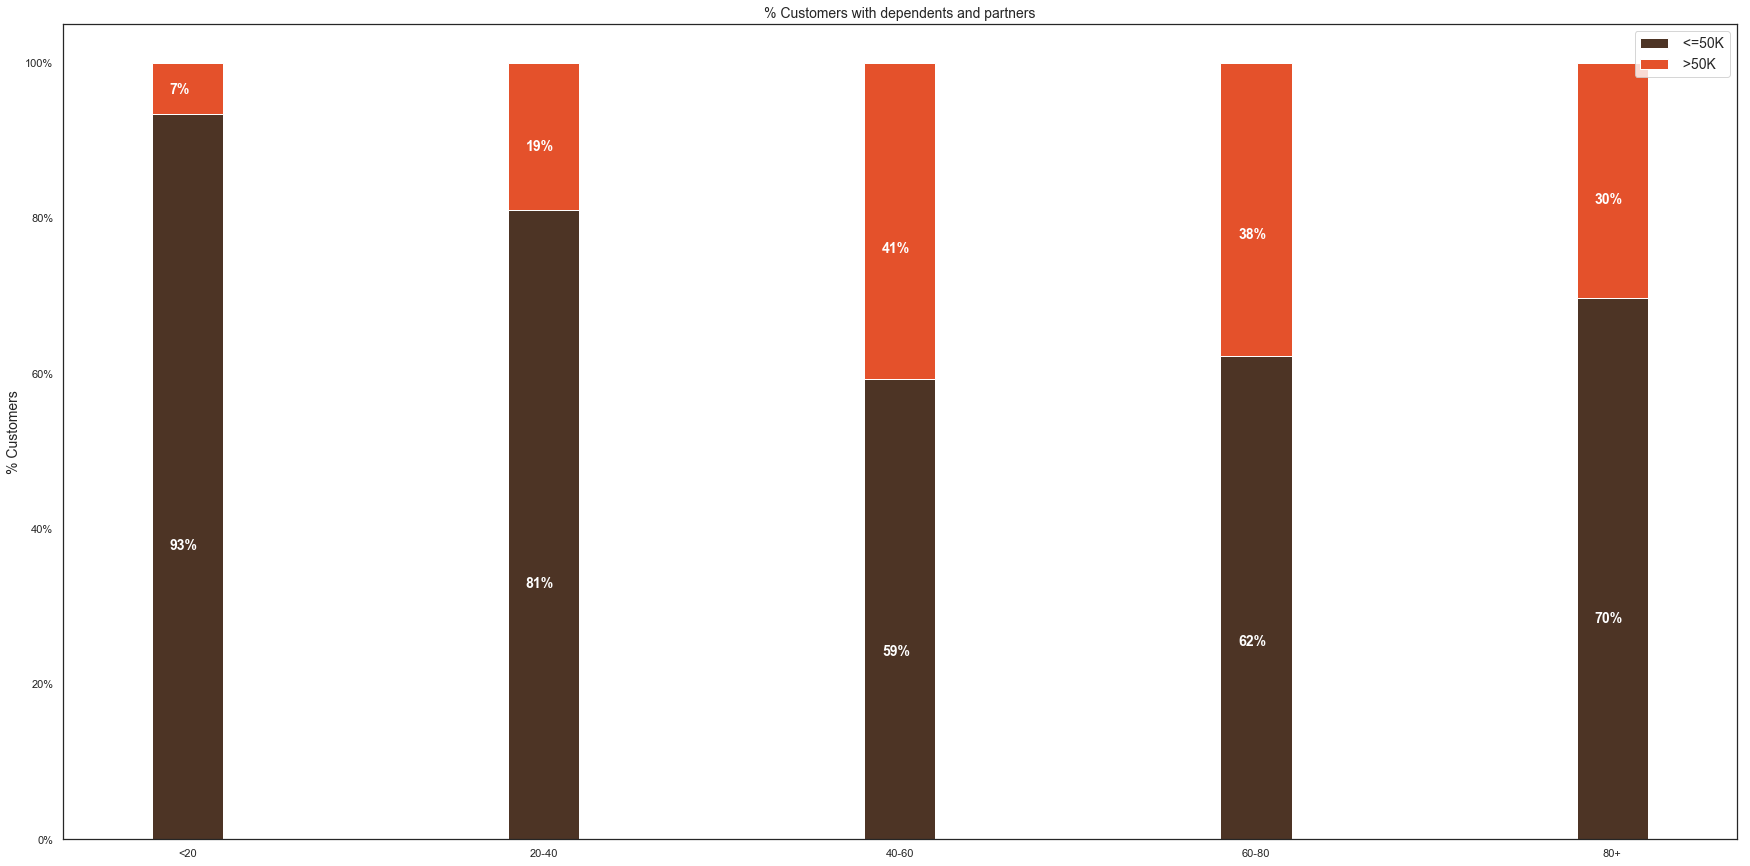

In [11]:
# Percentage distribution of education
bins = [0,20, 40, 60, 80, np.inf]
names = ['<20', '20-40', '40-60', '60-80', '80+']
df['hours_week_bin'] = pd.cut(df['hours_per_week'], bins, labels=names)

df2 = pd.DataFrame(df.groupby(['hours_week_bin','income'])['income'].count())
df3 = df2.unstack()
df3 = df3.iloc[:,:].apply(lambda x: x*100/x.sum(),axis = 1)

plt.figure(figsize = (30,5))
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'income'].plot.bar(stacked=True, color=colors,
                                      figsize=(30,15),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'upper right',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
plt.show()

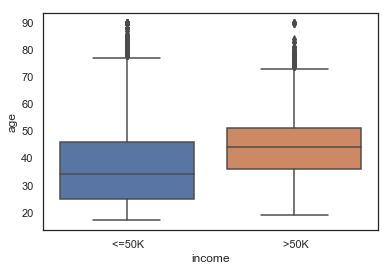

In [12]:
sns.boxplot(df.income,df.age)

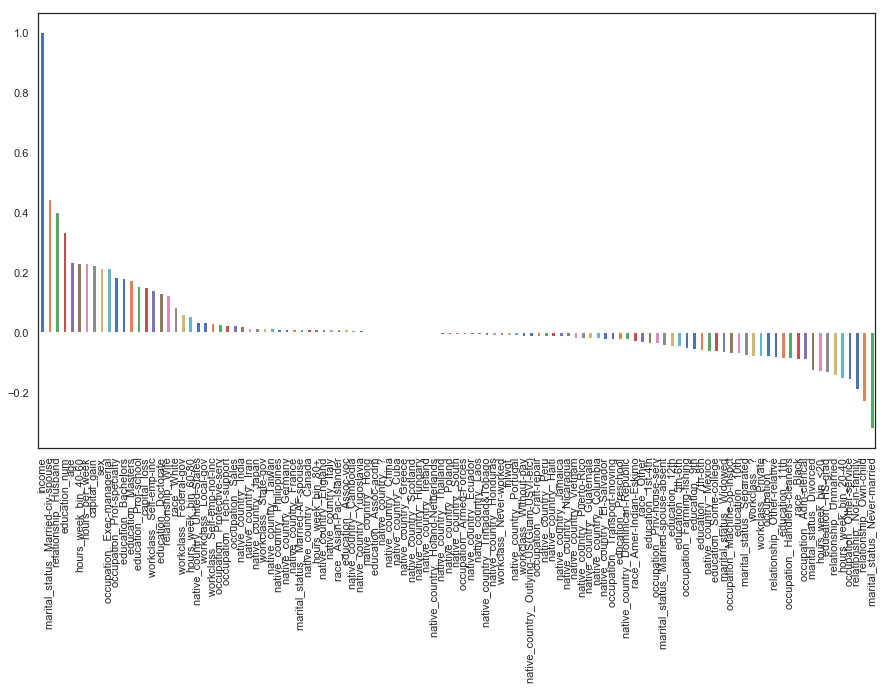

In [31]:
df['income'].replace(to_replace=' >50K', value=1, inplace=True)
df['income'].replace(to_replace=' <=50K',  value=0, inplace=True)

# Checking the feature importance
df_dummy = pd.get_dummies(df)
df_dummy
#Auto encodes any dataframe column of type category or object.
# def dummyEncode(df):
#         columnsToEncode = list(df.select_dtypes(include=['category','object']))
#         le = LabelEncoder()
#         for feature in columnsToEncode:
#             if df[feature].nunique() <= 2:
#                 try:
#                     df[feature] = le.fit_transform(df[feature])
#                 except:
#                     print('Error encoding '+feature)
#         return df
    
# df_dummy = dummyEncode(df)
# df_dummy


# # Correlation between variables and the target variable
plt.figure(figsize=(15,8))
df_dummy.corr()['income'].sort_values(ascending = False).plot(kind='bar')

# Should repeat the same process for test also and align the columns in both train and test

# We will use the data frame where we had created dummy variables
y = df_dummy['income'].values
X = df_dummy.drop(columns = ['income'])

# Scaling
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [37]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression

lgr_clf = LogisticRegression()
lgr_clf.fit(X_train, y_train)
y_pred = lgr_clf.predict(X_test)
y_score = lgr_clf.predict_proba(X_test)[:,1]


test_mse = metrics.mean_squared_error(y_pred, y_test)

print('Logistic regression')
print(test_mse)
print ('Accuracy using Logistic:',round(accuracy_score(y_test, y_pred),3))
mat_r = confusion_matrix(y_test, y_pred)
print(mat_r)
 


0.14832633841744294
Accuracy using Random Forest: 0.852
[[6923  513]
 [ 936 1397]]


In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier(n_estimators = 250,max_features = None).fit(X_train, y_train)
# grid_params = {'criterion': ['gini'], 'max_features' : [None], 'n_estimators': [200,300,400,500]}
# para_search =  GridSearchCV(model, grid_params, scoring = 'accuracy', cv = 5).fit(X_train, y_train)
# best_model = para_search.best_estimator_

lgr_clf = RandomForestClassifier()
lgr_clf.fit(X_train, y_train)
y_pred = lgr_clf.predict(X_test)
y_score = lgr_clf.predict_proba(X_test)[:,1]


test_mse = metrics.mean_squared_error(y_pred, y_test)

print('Random forest')
print(test_mse)
print ('Accuracy using Random Forest:',round(accuracy_score(y_test, y_pred),3))
mat_r = confusion_matrix(y_test, y_pred)
print(mat_r)